#neural network For Binary classification


In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(path, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
from sklearn.preprocessing import LabelEncoder
x = df.values[:, :-1]
y = df.values[:, -1]
x = x.astype('float32')
y = LabelEncoder().fit_transform(y)
y = y.astype('float32')
y = y.reshape((len(y), 1))

In [ ]:
x

array([[ 1.     ,  0.     ,  0.99539, ..., -0.54487,  0.18641, -0.453  ],
       [ 1.     ,  0.     ,  1.     , ..., -0.06288, -0.13738, -0.02447],
       [ 1.     ,  0.     ,  1.     , ..., -0.2418 ,  0.56045, -0.38238],
       ...,
       [ 1.     ,  0.     ,  0.94701, ...,  0.00442,  0.92697, -0.00577],
       [ 1.     ,  0.     ,  0.90608, ..., -0.03757,  0.87403, -0.16243],
       [ 1.     ,  0.     ,  0.8471 , ..., -0.06678,  0.85764, -0.06151]],
      dtype=float32)

In [ ]:
y

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
def __len__(x):
  return len(x)

In [ ]:
test_size = round(0.4 * len(x))
train_size = len(x) - test_size
from torch.utils.data import random_split
train,test=random_split(df, [train_size, test_size])


In [ ]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train, batch_size=32, shuffle=True)
test_dl = DataLoader(test, batch_size=1024, shuffle=False)
len(test_dl)

1

In [ ]:
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

from numpy import vstack

from sklearn.metrics import accuracy_score

In [ ]:
class loaddata(Dataset):
    def __init__(self, path):
        df = read_csv(path, header=None)
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        self.X = self.X.astype('float32')
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_splits(self, n_test=0.33):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])

In [ ]:
def prepare_data(path):
    dataset = loaddata(path)

    train, test = dataset.get_splits()
  
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
train_dl, test_dl = prepare_data(path)
train_dl

fully connected 3 layer network nonlinearity used ReLU, ReLU,Sigmoid in the respective layers

In [ ]:
class NeuralNetwork(Module):
    
    def __init__(self, n_inputs):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()
 
  
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        return X

fully connected 4 layer network nonlinearity used  ReLU activation in the all layers except last layer where we have sigmoid activation

In [ ]:
class NeuralNetwork22(Module):
    
    def __init__(self, n_inputs):
        super(NeuralNetwork22, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.hidden3 = Linear(8, 4)
        kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.hidden4 = Linear(4, 1)
        xavier_uniform_(self.hidden4.weight)
        self.act4 = Sigmoid()
 
  
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.hidden4(X)
        X = self.act4(X)
        return X

fully connected 2 layer network nonlinearity used  ReLU activation layers and sigmoid activation

In [ ]:
class NeuralNetwork23(Module):
    
    def __init__(self, n_inputs):
        super(NeuralNetwork23, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.hidden2 = Linear(10, 1)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
 
  
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        return X

In [ ]:
def train_model(train_dl, model,epochs):
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(epochs):
        for i, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()

In [ ]:
def predict(row, model):
    row = Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat

In [ ]:
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.round()
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    acc = accuracy_score(actuals, predictions)
    return acc

result using  4 layer network 

In [ ]:
model = NeuralNetwork22(34)
train_model(train_dl, model,100)

acc = evaluate_model(test_dl, model)

print("test_acc",acc)
acc = evaluate_model(train_dl, model)

print("train_acc",acc)

test_acc 0.9655172413793104
train_acc 0.9914893617021276


result using  2 layer network 

In [ ]:
model = NeuralNetwork23(34)
train_model(train_dl, model,100)

acc = evaluate_model(test_dl, model)

print("test_acc",acc)
acc = evaluate_model(train_dl, model)

print("train_acc",acc)

test_acc 0.9741379310344828
train_acc 0.9829787234042553


result using  3 layer network 

In [ ]:
model = NeuralNetwork(34)
train_model(train_dl, model,100)

acc = evaluate_model(test_dl, model)

print("test_acc",acc)
acc = evaluate_model(train_dl, model)

print("train_acc",acc)

test_acc 0.9655172413793104
train_acc 0.9914893617021276


------------------------------------------------------------------Comparing Result by Varying no of epochs in training--------------------------------------------------------------------------------

In [ ]:
model = NeuralNetwork(34)

In [ ]:
train_accuracy=[]
test_accuracy=[]
n_epochs=[]

In [ ]:
train_model(train_dl, model,1)
n_epochs.append(1)

In [ ]:

acc = evaluate_model(test_dl, model)
print("test_acc",acc)
test_accuracy.append(acc)

test_acc 0.603448275862069


In [ ]:
acc = evaluate_model(train_dl, model)
print("train_acc",acc)
train_accuracy.append(acc)

train_acc 0.625531914893617


In [ ]:
train_model(train_dl, model,5)
n_epochs.append(5)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.8103448275862069
train_acc 0.851063829787234


In [ ]:
train_model(train_dl, model,10)
n_epochs.append(10)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.8879310344827587
train_acc 0.9234042553191489


In [ ]:
train_model(train_dl, model,20)
n_epochs.append(20)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.9051724137931034
train_acc 0.9872340425531915


In [ ]:
train_model(train_dl, model,30)
n_epochs.append(30)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.9137931034482759
train_acc 0.9914893617021276


In [ ]:
train_model(train_dl, model,50)
n_epochs.append(50)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.9137931034482759
train_acc 1.0


In [ ]:
train_model(train_dl, model,100)
n_epochs.append(100)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.9051724137931034
train_acc 1.0


In [ ]:
train_model(train_dl, model,150)
n_epochs.append(150)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.896551724137931
train_acc 1.0


In [ ]:
train_model(train_dl, model,180)
n_epochs.append(180)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.896551724137931
train_acc 1.0


In [ ]:
train_model(train_dl, model,200)
n_epochs.append(200)
acc = evaluate_model(test_dl, model)
test_accuracy.append(acc)
print("test_acc",acc)
acc = evaluate_model(train_dl, model)
train_accuracy.append(acc)
print("train_acc",acc)

test_acc 0.896551724137931
train_acc 1.0


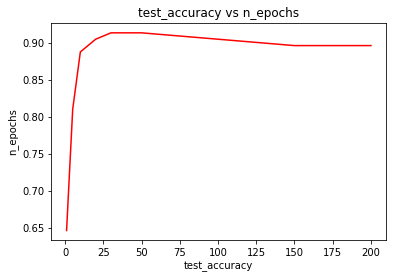

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.array(test_accuracy)
y=np.array(n_epochs)
fig = plt.figure()
plt.title("test_accuracy vs n_epochs")
plt.xlabel("test_accuracy")
plt.ylabel("n_epochs")
plt.plot(y,x , color ="red")
plt.show()

# Show the plot


In [ ]:
x

array([0.64655172, 0.81034483, 0.88793103, 0.90517241, 0.9137931 ,
       0.9137931 , 0.90517241, 0.89655172, 0.89655172, 0.89655172,
       0.89655172])

In [ ]:
y

array([  1,   5,  10,  20,  30,  50, 100, 150, 180, 200, 200])

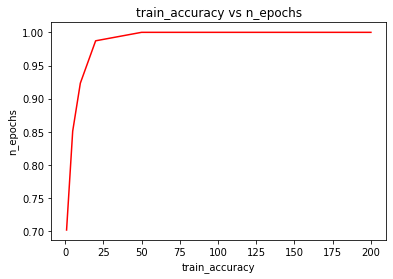

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.array(train_accuracy)
y=np.array(n_epochs)
fig = plt.figure()
plt.title("train_accuracy vs n_epochs")
plt.xlabel("train_accuracy")
plt.ylabel("n_epochs")
plt.plot(y,x , color ="red")
plt.show()



# neural network For Linear regression 

In [ ]:
from torch.nn import MSELoss
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

In [ ]:
df=read_csv(path)
df


,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:

train_dl, test_dl = prepare_data(path)

fully connected 3 layer network  with sigmoid activation

In [ ]:
class NeuralNetwork2(Module):
    def __init__(self, n_inputs):
        super(NeuralNetwork2, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
 
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        return X

fully connected 2 layer network  with sigmooid activation

In [ ]:
class NeuralNetwork26(Module):
    def __init__(self, n_inputs):
        super(NeuralNetwork26, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        self.hidden2 = Linear(10, 1)
        xavier_uniform_(self.hidden2.weight)
 
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        return X



fully connected 4 layer network  with ReLu activation in the first two layer  and sigmoid activation in the last layer



In [ ]:
class NeuralNetwork27(Module):
    def __init__(self, n_inputs):
        super(NeuralNetwork27, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = ReLU()
        self.hidden3 = Linear(8, 8)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()
        self.hidden4 = Linear(8, 1)
        xavier_uniform_(self.hidden4.weight)
 
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.hidden4(X)
        return X

In [ ]:
def predict2(row, model):
    row = Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat

In [ ]:
def train_model2(train_dl, model,n_epoch):
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(n_epoch):
        for i, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()

In [ ]:
def evaluate_model2(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    return mse

In [ ]:
model2 = NeuralNetwork2(13)

In [ ]:
train_model2(train_dl, model2,20)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)

mean_squared_error 3695.1875


mean_squared_error on given data using 3 layer network

In [ ]:
model2 = NeuralNetwork2(13)
train_model2(train_dl, model2,100)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)

mean_squared_error 3664.7786


mean_squared_error on given data using 2 layer network

In [ ]:
model2 = NeuralNetwork26(13)
train_model2(train_dl, model2,100)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)

mean_squared_error 3729.854


mean_squared_error on given data using 4 layer network

In [ ]:
model2 = NeuralNetwork27(13)
train_model2(train_dl, model2,100)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)

mean_squared_error 3656.03


------------------------------------------------------------------Comparing Result by Varying no of epochs in training--------------------------------------------------------------------------------

In [ ]:
mean_square_error=[]
n_epoch=[]

In [ ]:
train_model2(train_dl, model2,1)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(1)

mean_squared_error 3719.1602


In [ ]:
train_model2(train_dl, model2,2)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(2)

mean_squared_error 3755.2095


In [ ]:
train_model2(train_dl, model2,3)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(3)

mean_squared_error 3702.5022


In [ ]:
train_model2(train_dl, model2,5)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(5)

mean_squared_error 3862.3035


In [ ]:
train_model2(train_dl, model2,10)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(10)

mean_squared_error 3725.234


In [ ]:
train_model2(train_dl, model2,50)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(50)

mean_squared_error 3852.2585


In [ ]:
train_model2(train_dl, model2,20)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(20)

mean_squared_error 3700.0913


In [ ]:
train_model2(train_dl, model2,30)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(30)

mean_squared_error 3718.4187


In [ ]:
train_model2(train_dl, model2,80)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(80)

mean_squared_error 3696.9714


In [ ]:
train_model2(train_dl, model2,100)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(100)

mean_squared_error 3714.518


In [ ]:
train_model2(train_dl, model2,150)
mse = evaluate_model2(test_dl, model2)
print("mean_squared_error",mse)
mean_square_error.append(mse)
n_epoch.append(150)

mean_squared_error 3849.5322


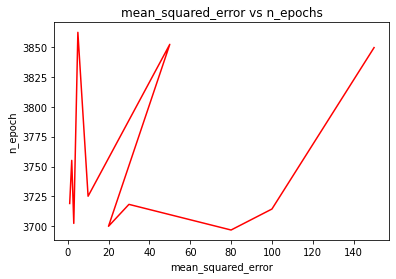

In [ ]:

x=np.array(mean_square_error)
y=np.array(n_epoch)
fig = plt.figure()
plt.title("mean_squared_error vs n_epochs")
plt.xlabel("mean_squared_error")
plt.ylabel("n_epoch")
plt.plot(y,x , color ="red")
plt.show()

In [ ]:
x

array([3719.1602, 3755.2095, 3702.5022, 3862.3035, 3725.234 , 3852.2585,
       3700.0913, 3718.4187, 3696.9714, 3714.518 , 3849.5322],
      dtype=float32)

In [ ]:
y

array([  1,   2,   3,   5,  10,  50,  20,  30,  80, 100, 150])